PHYS 381 - Computational Physics I - Final Exam

FILE: final_exercise1.ipynb

NAME: David (Scott) Salmon

UCID: 30093320

DATE: 2023-04-18

### Part A:
"Choose a fitting method that you learned in Assignment #5: Curve fitting, optimizations, and
finite difference methods to determine ϵ and σ parameters of the Lennard-Jones potential energy
describing the bond of each of the gases introduced above. Apply the fitting method onto the
given data points contained in the provided files and obtain the (ϵ, σ) fitting parameters for all
gases. Write the name of the method you chose in a Markdown cell and print all (ϵ, σ) values
determined by the method for each of the gases."


In [13]:
#This cell is almost entirely about organizing the 4 data text files and producing their epsilon and sigma values, + creating lists that will be used in graphs in future cells
#there is a lot of repeated code instide this file as a result, as the process is identical for all 4 data files.

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import math

#Lennard-Jones Potential Energy function outlined in Final Exam document
def potential_model(radius,param):
    epsilon, sigma = param
    result = 4*epsilon*( (sigma/radius)**12 - (sigma/radius)**6)
    return result

#reduced chi formula from lecture notes
def reduced_chi(param, *args):
    epsilon, sigma = param
    x, y_data, uncertainty = args
    y_model = potential_model(x, (epsilon, sigma))
    residuals = (y_model - y_data)/uncertainty
    chi2 = np.sum( residuals**2/len(y_data) )
    return chi2

#this whole chunk of code opens all of the data files and creates "x" and "y" lists for each element. 
argon_file = open("potential_Ar2_QM_d2.txt","r")
helium_file = open("potential_He2_QM_d2.txt","r")
krypton_file = open("potential_Kr2_QM_d2.txt","r")
neon_file = open("potential_Ne2_QM_d2.txt","r")
argon_data = argon_file.read()
helium_data = helium_file.read()
krypton_data = krypton_file.read()
neon_data = neon_file.read()
argon_list = argon_data.split("\n") #making a list by splitting at every new line
helium_list = helium_data.split("\n")
krypton_list = krypton_data.split("\n")
neon_list = neon_data.split("\n")
a_x_List = []
a_y_List = []
h_x_List = []
h_y_List = []
k_x_List = []
k_y_List = []
n_x_List = []
n_y_List = []

N = len(argon_list)-1 #N = amount of data points, same for all 4 lists
i = 0
while (i<N): #while i is less then number of points in data list, keep looping
    components = argon_list[i]
    components = components.split(" ") #splitting at every space to seperate x and y components
    a_x_List.append(components[0]) #making x list corresponding to each data point
    a_y_List.append(components[1]) #making y list corresponding to each data point
    
    components = helium_list[i]
    components = components.split(" ") #splitting at every space to seperate x and y components
    h_x_List.append(components[0]) #making x list corresponding to each data point
    h_y_List.append(components[1]) #making y list corresponding to each data point

    components = krypton_list[i]
    components = components.split(" ") #splitting at every space to seperate x and y components
    k_x_List.append(components[0]) #making x list corresponding to each data point
    k_y_List.append(components[1]) #making y list corresponding to each data point
    
    components = neon_list[i]
    components = components.split(" ") #splitting at every space to seperate x and y components
    n_x_List.append(components[0]) #making x list corresponding to each data point
    n_y_List.append(components[1]) #making y list corresponding 

    i = i + 1

#ARGON
a_x = np.float_(a_x_List) #converting list of strings to floats
a_y = np.float_(a_y_List) #converting list of strings to floats
epsilon0, sigma0 = 10, 25 #initial predictions for epsilon and sigma values, randomly chosen until a nice figure was produced
result = scipy.optimize.minimize(reduced_chi,[epsilon0, sigma0],(a_x,a_y,1), method="Nelder-Mead") #optimize method
a_e = result.x[0] #predicted epsilon value from minimize function
a_s = result.x[1] #predicted sigma value from minimize function
a_y_model = potential_model(a_x, (a_e, a_s)) #this uses the predicted epsilon and sigma values to make a predicted plot

#HELIUM
h_x = np.float_(h_x_List) #converting list of strings to floats
h_y = np.float_(h_y_List) #converting list of strings to floats
epsilon0, sigma0 = 5, 5 #initial predictions for epsilon and sigma values, randomly chosen until a nice figure was produced
result = scipy.optimize.minimize(reduced_chi,[epsilon0, sigma0],(h_x,h_y,1), method="Nelder-Mead") #optimize method
h_e = result.x[0] #predicted epsilon value from minimize function
h_s = result.x[1] #predicted sigma value from minimize function
h_y_model = potential_model(h_x, (h_e, h_s)) #this uses the predicted epsilon and sigma values to make a predicted plot

#KRYPTON
k_x = np.float_(k_x_List) #converting list of strings to floats
k_y = np.float_(k_y_List) #converting list of strings to floats
epsilon0, sigma0 = 10, 20 #initial predictions for epsilon and sigma values, randomly chosen until a nice figure was produced
result = scipy.optimize.minimize(reduced_chi,[epsilon0, sigma0],(k_x,k_y,1), method="Nelder-Mead") #optimize method
k_e = result.x[0] #predicted epsilon value from minimize function
k_s = result.x[1] #predicted sigma value from minimize function
k_y_model = potential_model(k_x, (k_e, k_s)) #this uses the predicted epsilon and sigma values to make a predicted plot

#NEON
n_x = np.float_(n_x_List) #converting list of strings to floats
n_y = np.float_(n_y_List) #converting list of strings to floats
epsilon0, sigma0 = 2, 5 #initial predictions for epsilon and sigma values, randomly chosen until a nice figure was produced
result = scipy.optimize.minimize(reduced_chi,[epsilon0, sigma0],(n_x,n_y,1), method="Nelder-Mead") #optimize method
n_e = result.x[0] #predicted epsilon value from minimize function
n_s = result.x[1] #predicted sigma value from minimize function
n_y_model = potential_model(n_x, (n_e, n_s)) #this uses the predicted epsilon and sigma values to make a predicted plot

#print statements for epsilon and sigma values
print("The calculated epsilon and sigma values for the Ar2 atoms were: %0.4fmeV and %0.4f Angstroms respectively"%(a_e, a_s))
print("The calculated epsilon and sigma values for the He2 atoms were: %0.4fmeV and %0.4f Angstroms respectively"%(h_e, h_s))
print("The calculated epsilon and sigma values for the Kr2 atoms were: %0.4fmeV and %0.4f Angstroms respectively"%(k_e, k_s))
print("The calculated epsilon and sigma values for the Ne2 atoms were: %0.4fmeV and %0.4f Angstroms respectively"%(n_e, n_s))


The calculated epsilon and sigma values for the Ar2 atoms were: 13.6881meV and 3.4244 Angstroms respectively
The calculated epsilon and sigma values for the He2 atoms were: 4.7540meV and 2.4055 Angstroms respectively
The calculated epsilon and sigma values for the Kr2 atoms were: 18.2179meV and 3.6977 Angstroms respectively
The calculated epsilon and sigma values for the Ne2 atoms were: 8.6694meV and 2.6845 Angstroms respectively


### CODE WORKFLOW
The first part of the code is defining functions that will be used later. The "potential_model" method is depicting the Lennard-Jones Potential Energy function given in the manual. It takes in a radius, epsilon value and sigma value and spits out the potential energy at that point. The second method is the "reduced-chi-squared method" we used in Assignment 2. More details about this method are discussed below in the discussion section, but this function takes in an epsilon and sigma value, as well as x and y lists (and uncertainty, if given), and then it essentially compares the quality of results determined with the epsilon and sigma values to the actual data values. The chi value that is returned shows the "quality" of the parameters. Ideally, the chi value is as low as possible.

The first active part of the code is all about opening the files and arranging the data into lists that can be used later. The whole big section first opens all 4 text files and assigns them to data variables, and then the data variables are stripped at every component and assigned into x and y lists for all 4 gasses in the while loop.

Once the loop is complete, all the data is organized into x and y lists and we are ready to begin finding the epsilon and sigma values for each element. The process is repeated for all 4 elements. First, the x and y lists are currently lists of strings, so they are quickly converted into lists of floats. Then initial values are set for the epsilon and sigma values (arbitrarily chosen through trial and error), and then the minimize function is run (discussed below). Once the minimize function was done, the most ideal sigma and epsilon values were determined and assigned to variables for future use. Finally, the "line of best fit" was determined for all 4 gasses using the Lennard-Jones Potential Energy function (discussed below), and this line of best fit is saved into a variable to be used in the future for plotting the potential energy vs radius graphs later. Then the final part of the code is a few print statements to print the results for the epsilon and sigma values of the gasses.

### DISCUSSION
The method I chose to calculate this one was the Nelder-Mead method, using the scipy.optimize.minimize function to find the optimal fit model (which was then used to find parameters ε and σ). I chose this method because it easily requires the least amount of code of all the methods shown in class, and it was fairly simple to implement.

It required the reduced chi squared method we used in Assignment 5 to implement the minimize function. The chi function takes in epsilon and sigma values and then plugs them into the defined potential energy function (Lennard-Jones Potential Energy) and then determines the "quality" of the result by comparing the result to the actual data values. What the minimize fuction does is it takes in an initial guess for the sigma and epsilon values, and then it uses chi function repeatedly (using slightly different epsilon and sigma values every iteration that are determined by the Nelder-Nead method) and it does this until the most ideal epsilon and sigma values are determined. The results from the minimize function were printed above.

### Part B:
"Use the values of (ϵ, σ) you found in the previous item and plot U(r) × r and F(r) × r where
F(r) is the interatomic force. Choose a method that you learned in Assignment #1: Finding
minima of functions to determine the equilibrium properties of each noble gas molecule introduced above. In other words, determine the equilibrium separation between the atoms and the
minimum of the potential energy for all gases. Mark with a scatter symbol (in all plots) the
point characterizing the equilibrium properties of the molecules found by the method. Write
the name of the method you chose in a Markdown cell and print all quantities characterizing
the equilibrium properties determined by the method for all molecules. Write also how many
iterations your method took to find the minimum of the potential energy for all molecules
and write the tolerance information that the method requires"

In [14]:
#The equilibrium point for U(r) is determined through finding the root of its derivative. The derivative of U(r) is also known as F(r) (the interatomic force). 
#The interatomic force F(r) is computed via taking the derivative of the interatomic potential energy U(r) function, and multiplying that result by -1. 
#We can then use the Newton-Raphson method from Assignment #1 to calculate the root of the F(r) function, and therefore determine the equilibrium point in U(r).
#This also means we need to find the derivative of F(r) to employ the Newton-Raphson Method

def F_r(r,epsilon, sigma): #derivative of 4ε[(σ/r)^12 - (σ/r)^6]) = -1*[24εσ^6(r^6-2σ^6)]/(r^13), then multiply this result by -1
  result = -(24*epsilon*(sigma**6) * (r**6 - 2*(sigma**6))) / (r**13)
  return result

def dF_r(r, epsilon, sigma): #derivative of -1*[24εσ^6(r^6-2σ^6)]/(r^13) = [24εσ^6(7r^6-26σ^6)]/(r^14)
  result = (24*epsilon*(sigma**6) * (7*(r**6) - 26*(sigma**6))) / (r**14)
  return result

def NRmethod(x,param): #Newton-Raphson method
    #takes in an x value, computes the function and derivative function at this x value, divides them and subtracts them from x, returns new x as x
    #if this process is repeated, x will get smaller and smaller until it is a root of the original function. while coding, we reiterate this until x is smaller than
    #a specified tolerance value
    epsilon, sigma = param
    result = x - (F_r(x,epsilon,sigma)/dF_r(x,epsilon,sigma)) #x - [f(x)/f'(x)]
    return result

#this is using the force function above to make lists of the force vs. radius for all 4 gasses
a_F, h_F, k_F, n_F = F_r(a_x, a_e, a_s), F_r(h_x, h_e, h_s), F_r(k_x, k_e, k_s), F_r(n_x, n_e, n_s)

#this is setting initial "guesses" for the Newton-Raphson method
a_r0, h_r0, k_r0, n_r0 = a_x[2], h_x[2], k_x[2],n_x[2]
tol = 1e-12 #specified tolerance value for NRmethod
a_nsteps = h_nsteps = k_nsteps = n_nsteps = 0 #initializing step variables

#these 4 while loops are employing NR method for all 4 gasses
while math.fabs(F_r(a_r0,a_e,a_s)) > tol:
    a_r0 = NRmethod(a_r0,(a_e, a_s))
    a_nsteps += 1 # a_nsteps = a_nsteps + 1

while math.fabs(F_r(h_r0,h_e,h_s)) > tol:
    h_r0 = NRmethod(h_r0,(h_e, h_s))
    h_nsteps += 1 # h_nsteps = h_nsteps + 1

while math.fabs(F_r(k_r0,k_e,k_s)) > tol:
    k_r0 = NRmethod(k_r0,(k_e, k_s))
    k_nsteps += 1 # k_nsteps = k_nsteps + 1

while math.fabs(F_r(n_r0,n_e,n_s)) > tol:
    n_r0 = NRmethod(n_r0,(n_e, n_s))
    n_nsteps += 1 # a_nsteps = a_nsteps + 1

#this is finding the energy values at equilibrium for graphing purposes
a_equilibrium = potential_model(a_r0,(a_e,a_s))
h_equilibrium = potential_model(h_r0,(h_e,h_s))
k_equilibrium = potential_model(k_r0,(k_e,k_s))
n_equilibrium = potential_model(n_r0,(n_e,n_s))

#print statements
print("The calculated equilibrium point for the Ar2 atoms was at %0.4fÅ, with a potential energy of %0.2fmeV. The Newton-Raphson method took %i steps to complete."%(a_r0,a_equilibrium, a_nsteps))
print("The calculated equilibrium point for the He2 atoms was at %0.4fÅ, with a potential energy of %0.2fmeV. The Newton-Raphson method took %i steps to complete."%(h_r0,h_equilibrium,h_nsteps))
print("The calculated equilibrium point for the Kr2 atoms was at %0.4fÅ, with a potential energy of %0.2fmeV. The Newton-Raphson method took %i steps to complete."%(k_r0,k_equilibrium,k_nsteps))
print("The calculated equilibrium point for the Ne2 atoms was at %0.4fÅ, with a potential energy of %0.2fmeV. The Newton-Raphson method took %i steps to complete."%(n_r0,n_equilibrium,n_nsteps))

The calculated equilibrium point for the Ar2 atoms was at 3.8438Å, with a potential energy of -13.69meV. The Newton-Raphson method took 13 steps to complete.
The calculated equilibrium point for the He2 atoms was at 2.7000Å, with a potential energy of -4.75meV. The Newton-Raphson method took 7 steps to complete.
The calculated equilibrium point for the Kr2 atoms was at 4.1505Å, with a potential energy of -18.22meV. The Newton-Raphson method took 14 steps to complete.
The calculated equilibrium point for the Ne2 atoms was at 3.0133Å, with a potential energy of -8.67meV. The Newton-Raphson method took 9 steps to complete.


### CODE WORKFLOW
The first part of the code is all three user-defined functions: the Force Function, the derivative of the force function, and then the Newton-Raphson method function. The force function is simply the derivative of the potential energy function (Lennard-Jones Potential Energy) multiplied by -1. It takes in a radius, epsilon and sigma value and spits out the calculated force. Similarily, the next function is just the derivative of the force function. It again takes in a radius, epsilon and sigma value and spits out the calculated derivative of the force. Finally, the Newton Raphson method is defined. The mathematical explanation of this function is discussed below in the discussion section, but this function determines the root of the force function.

The next part of the code is applying the force function to create lists of the force over time for all 4 gasses. Then initial guesses are set for the epsilon and sigma values for the Newton-Raphson method, I just used the second element of the force lists for all of my initial guesses. A tolerance value is set to create an endpoint for the Newton-Raphson method, and step variables are initialized.

Finally, the NR method is employed to find the minimum point for all 4 gasses. The general algorithm is the same for all 4. The roots are determined and the amount of times the loop iterated is also tracked. Finally, I found all the "y" coordinates of the equilibrium points by plugging in the root value for "x" in the potential energy function from the first section.

### DISCUSSION
The chosen method to determine the equilibrium points of the gases was the Newton-Raphson method. This method was selected because it doesn't require very much code, and it is very efficient at finding the root to a function compared to other methods such as the bisection method. 

How the method works is it takes in an x value (and any required parameters for the function), computes the function and derivative function at this specific x value. It then divides these values and subtracts the result from the original value inputted. This returns a new x that is "closer" to the root than the original x was. If this process is repeated, x will get smaller and smaller until it is a root of the original function. While coding, we continute reiterate this process until the new "x" value is smaller than specified tolerance value. I chose a very small tolerance value of 1e-12 to ensure as much accuracy as possible. For this problem, it only took between 7 and 13 iterations to calculate the predicted equilibrium point for each gas. 

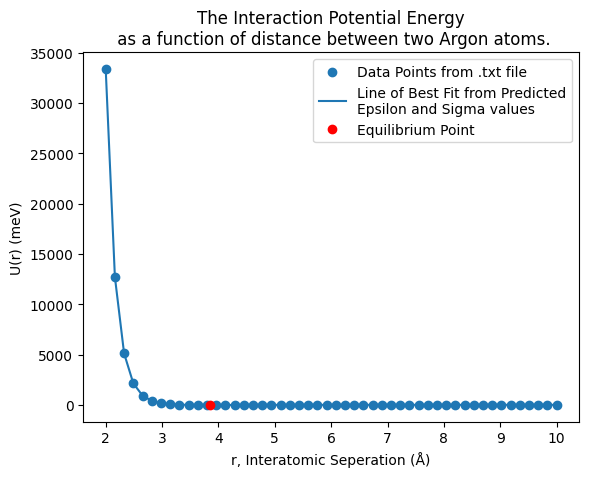

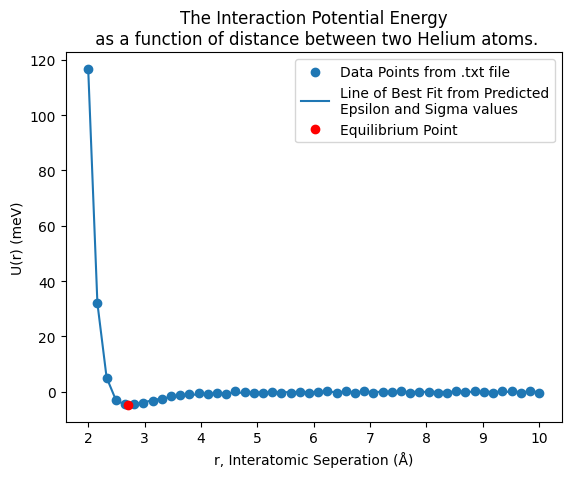

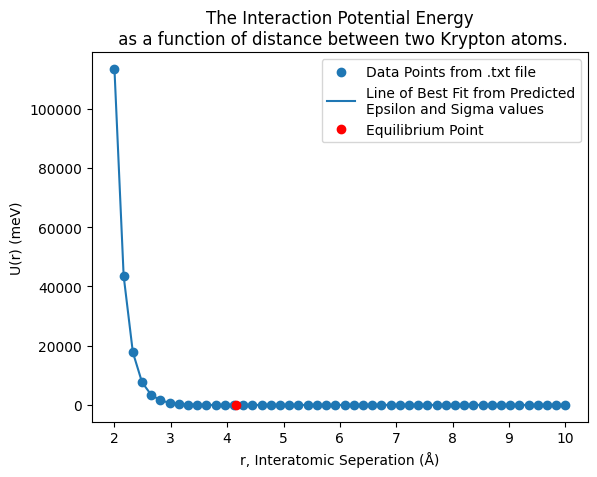

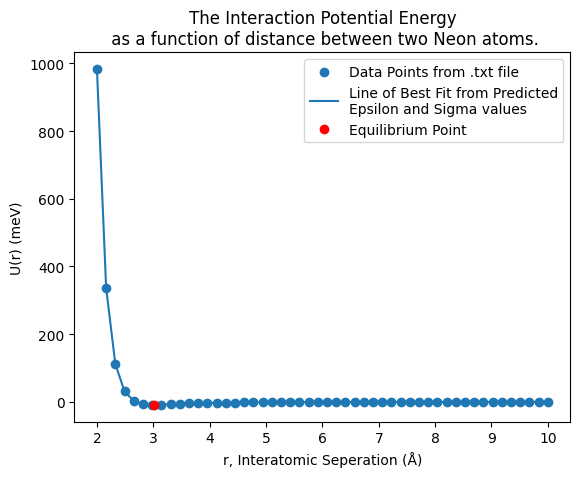

In [15]:
#U(r) vs. r plots

#this makes the Argon figure
plt.figure()
plt.scatter(a_x,a_y) #this plots the data points
plt.plot(a_x,a_y_model) #this plots the line of best fit
plt.plot(a_r0, a_equilibrium, 'ro') #this plots equilibrium point
plt.xlabel('r, Interatomic Seperation (Å)')
plt.ylabel('U(r) (meV)')
plt.title('The Interaction Potential Energy\n as a function of distance between two Argon atoms.')
plt.legend(['Data Points from .txt file','Line of Best Fit from Predicted\nEpsilon and Sigma values','Equilibrium Point'])
plt.show()

#this makes the Helium figure
plt.figure()
plt.scatter(h_x,h_y) #this plots the data points
plt.plot(h_x,h_y_model) #this plots the line of best fit
plt.plot(h_r0, h_equilibrium, 'ro') #this plots equilibrium point
plt.xlabel('r, Interatomic Seperation (Å)')
plt.ylabel('U(r) (meV)')
plt.title('The Interaction Potential Energy\n as a function of distance between two Helium atoms.')
plt.legend(['Data Points from .txt file','Line of Best Fit from Predicted\nEpsilon and Sigma values','Equilibrium Point'])
plt.show()

#this makes the Krypton figure
plt.figure()
plt.scatter(k_x,k_y) #this plots the data points
plt.plot(k_x,k_y_model) #this plots the line of best fit
plt.plot(k_r0, k_equilibrium, 'ro') #this plots equilibrium point
plt.xlabel('r, Interatomic Seperation (Å)')
plt.ylabel('U(r) (meV)')
plt.title('The Interaction Potential Energy\n as a function of distance between two Krypton atoms.')
plt.legend(['Data Points from .txt file','Line of Best Fit from Predicted\nEpsilon and Sigma values','Equilibrium Point'])
plt.show()

#this makes the Neon figure
plt.figure()
plt.scatter(n_x,n_y) #this plots the data points
plt.plot(n_x,n_y_model) #this plots the line of best fit
plt.plot(n_r0, n_equilibrium, 'ro') #this plots equilibrium point
plt.xlabel('r, Interatomic Seperation (Å)')
plt.ylabel('U(r) (meV)')
plt.title('The Interaction Potential Energy\n as a function of distance between two Neon atoms.')
plt.legend(['Data Points from .txt file','Line of Best Fit from Predicted\nEpsilon and Sigma values','Equilibrium Point'])
plt.show()

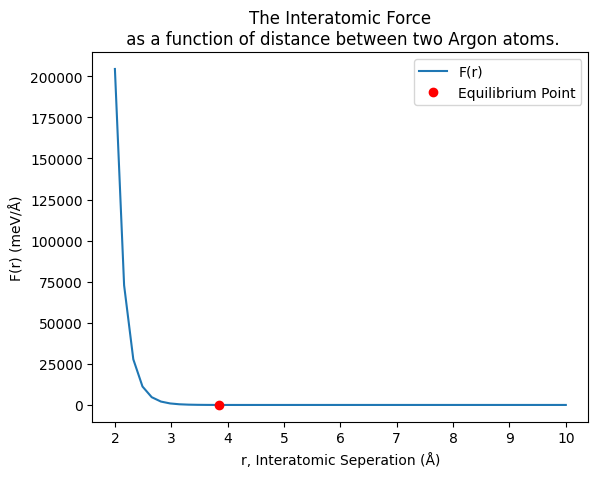

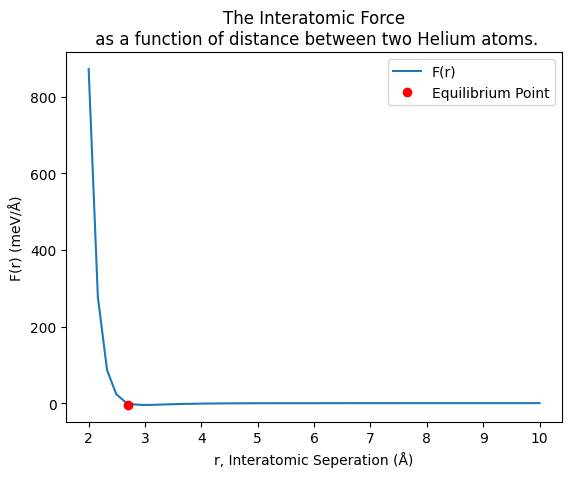

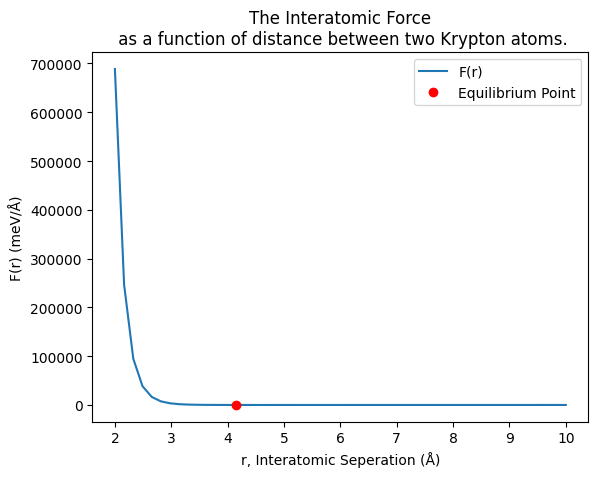

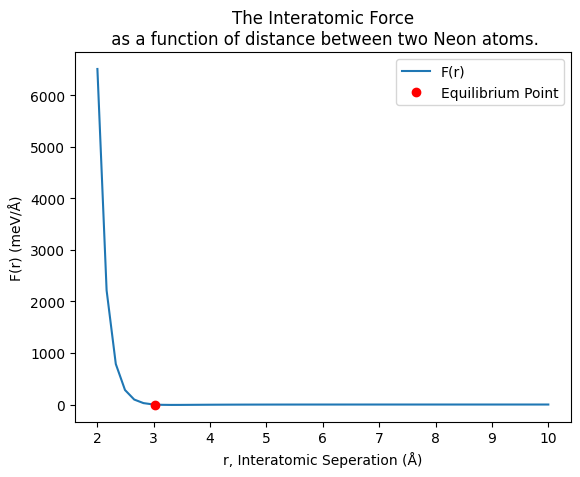

In [16]:
#F(r) vs. r

#this makes the Argon figure
plt.figure()
plt.plot(a_x, a_F) #this plots the force vs. radius
plt.plot(a_r0, a_equilibrium, 'ro') #this plots equilibrium point
plt.xlabel('r, Interatomic Seperation (Å)')
plt.ylabel('F(r) (meV/Å)')
plt.title('The Interatomic Force\n as a function of distance between two Argon atoms.')
plt.legend(['F(r)','Equilibrium Point'])
plt.show()

#this makes the Helium figure
plt.figure()
plt.plot(h_x, h_F) #this plots the force vs. radius
plt.plot(h_r0, h_equilibrium, 'ro') #this plots equilibrium point
plt.xlabel('r, Interatomic Seperation (Å)')
plt.ylabel('F(r) (meV/Å)')
plt.title('The Interatomic Force\n as a function of distance between two Helium atoms.')
plt.legend(['F(r)','Equilibrium Point'])
plt.show()

#this makes the Krypton figure
plt.figure()
plt.plot(k_x, k_F) #this plots the force vs. radius
plt.plot(k_r0, k_equilibrium, 'ro') #this plots equilibrium point
plt.xlabel('r, Interatomic Seperation (Å)')
plt.ylabel('F(r) (meV/Å)')
plt.title('The Interatomic Force\n as a function of distance between two Krypton atoms.')
plt.legend(['F(r)','Equilibrium Point'])
plt.show()

#this makes the Neon figure
plt.figure()
plt.plot(n_x, n_F) #this plots the force vs. radius
plt.plot(n_r0, n_equilibrium, 'ro') #this plots equilibrium point
plt.xlabel('r, Interatomic Seperation (Å)')
plt.ylabel('F(r) (meV/Å)')
plt.title('The Interatomic Force\n as a function of distance between two Neon atoms.')
plt.legend(['F(r)','Equilibrium Point'])
plt.show()